## Importamos librerias necesarias para iniciar EDA

In [274]:
import pandas as pd
import numpy as np
import warnings
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from IPython.display import display
# Text
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


warnings.filterwarnings('ignore')#to filter all the warnings
pd.set_option('float_format', '{:.4f}'.format)# to keep the float values short

[nltk_data] Downloading package punkt to /home/kennydev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kennydev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Carga del dataset preprocesado

In [275]:
df = pd.read_csv('../data/preprocessed/video_cln.csv')
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['category_name']= df['category_name'].astype('category')
df.head(3)

video_id trending_date  category_id        publish_time    views  \
0  2kyS6SvSYSE    2017-11-14           22 2017-11-13 17:13:01   748374   
1  1ZAPwfrtAFY    2017-11-14           24 2017-11-13 07:30:00  2418783   
2  5qpjK5DgCt4    2017-11-14           23 2017-11-12 19:05:24  3191434   

    likes  dislikes  comment_count   category_name  \
0   57527      2966          15954  People & Blogs   
1   97185      6146          12703   Entertainment   
2  146033      5339           8181          Comedy   

                                                tags  \
0                                    shantell martin   
1  last week tonight trump presidency last week t...   
2  racist superman rudy mancuso king bach racist ...   

                                         video_title    channel_title  \
0                 we want to talk about our marriage     caseyneistat   
1  the trump presidency last week tonight with jo...  lastweektonight   
2   racist superman rudy mancuso king bach lele pons     rudy mancuso   

                                         description  
0  shantell s channel https www youtube com shant...  
1  one year after the presidential election john ...  
2  watch my previous video n nsubscribe https www...

### Descripcion del dataset preprocesado

* video_id------------------------- ID de cada video `(string)`
* published_time----------------------- Fecha _(año-mes-dia)_ de publicacion del video `(datetime)`
* category_id------------------------ Id de cada categoria por video `(Int)`
* trending_date---------------------- Fecha _(año-mes-dia hora:min:seg)_ en el que el video se hizo viral `(datetime)`
* view_count------------------------- Cantidad de visitas del video `(Int)`
* likes------------------------------ Cantidad del likes del video `(Int)`
* dislikes--------------------------- Cantidad de dislike del video `(Int)`
* comment_count---------------------- Cantidad de comentarios del video `(Int)`
* category_name----------------------- Nombre de la categoria ligada al category_id `(category)`
* description----------------------------- Descripcion por cada video `(string)`
* tags--------------------------------------- Etiquetas sobre el contenido del video `(string)`
* video_title------------------------------ Titulo del video `(string)`
* channel_title-------------------------- Titulo del canal que publico el video `(string)`

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       40949 non-null  object        
 1   trending_date  40949 non-null  datetime64[ns]
 2   category_id    40949 non-null  int64         
 3   publish_time   40949 non-null  datetime64[ns]
 4   views          40949 non-null  int64         
 5   likes          40949 non-null  int64         
 6   dislikes       40949 non-null  int64         
 7   comment_count  40949 non-null  int64         
 8   category_name  40949 non-null  category      
 9   tags           40949 non-null  object        
 10  video_title    40946 non-null  object        
 11  channel_title  40949 non-null  object        
 12  description    40949 non-null  object        
dtypes: category(1), datetime64[ns](2), int64(5), object(5)
memory usage: 3.8+ MB


### 1. ¿Cuáles son las categorías de vídeos que reciben mayores vistas y Likes?

In [277]:
df[df['description'].isna()]

Empty DataFrame
Columns: [video_id, trending_date, category_id, publish_time, views, likes, dislikes, comment_count, category_name, tags, video_title, channel_title, description]
Index: []

In [278]:
# ¿Cuantas categorias existen en nuestro dataset?
len(df['category_name'].unique())

16

In [279]:
df_like_dislikes_cat = df.groupby('category_name')[['likes', 'dislikes', 'views']].sum()
df_like_dislikes_cat.sort_values('views', ascending=False)

likes  dislikes        views
category_name                                           
Music                  1416838584  51179008  40132892190
Entertainment           530516491  42987663  20604388195
Film & Animation        165997476   6075148   7284156721
Comedy                  216346746   7230391   5117426208
People & Blogs          186615999  10187901   4917191726
Sports                   98621211   5133551   4404456673
Howto & Style           162880075   5473899   4078545064
Science & Technology     82532638   4548402   3487756816
Gaming                   69038284   9184466   2141218625
News & Politics          18151033   4180049   1473765704
Education                49257772   1351972   1180629990
Pets & Animals           19370702    527379    764651989
Autos & Vehicles          4245656    243010    520690717
Travel & Events           4836246    340427    343557084
Nonprofits & Activism    14815646   3310381    168941392
Shows                     1082639     24508     51501058

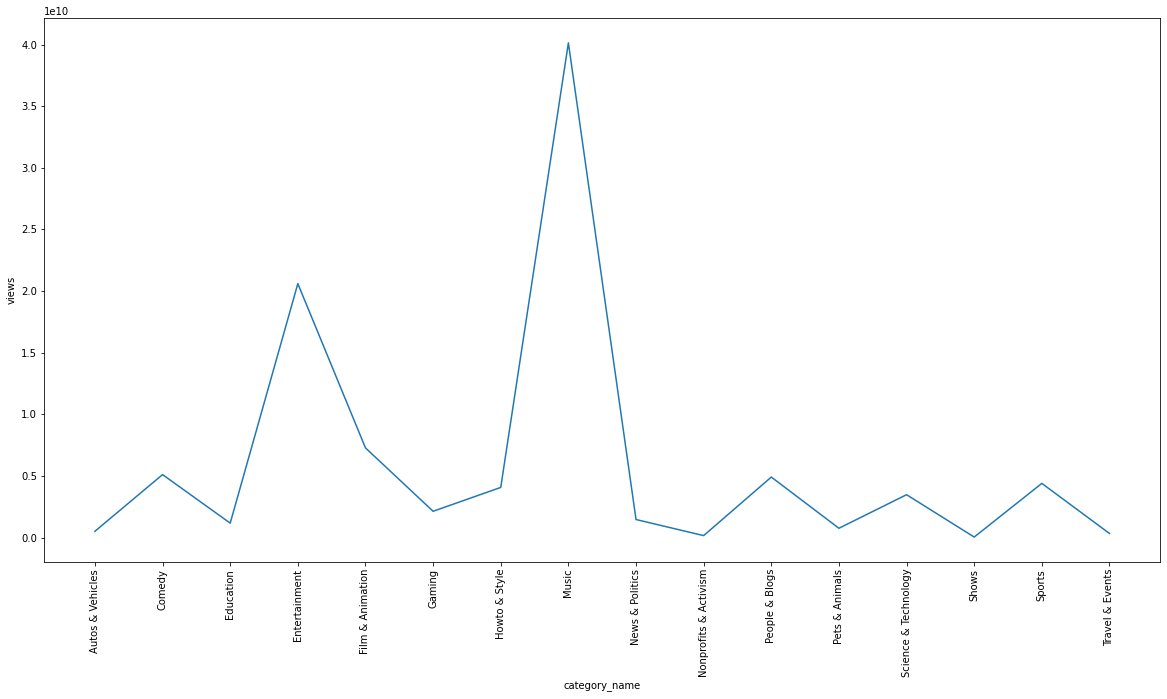

In [280]:
plt.rcParams["figure.figsize"] = (20,10)
sns.lineplot(x=df_like_dislikes_cat.index, y='views', data=df_like_dislikes_cat)
plt.xticks(rotation='vertical');

In [281]:
fig = px.line(df_like_dislikes_cat, 
              x=df_like_dislikes_cat.index,
              y='views',
              title='Views per category')
fig.show()

<p style='color: green'>Conclusion</p>

* `Music` es la categoria que mas vistas acumula con mas de 40 billones de visitas
* `Entertainment` es la categoria que se acerca mas a music pero esta cuenta con un total de 20B de visitas acumuladas.
* `Film & Animation` obtiene el 3er lugar de esta ranking con mas de 7B de visitas acumuladas en sus videos

In [282]:
df_like_dislikes_cat.sort_values('likes', ascending=False)

likes  dislikes        views
category_name                                           
Music                  1416838584  51179008  40132892190
Entertainment           530516491  42987663  20604388195
Comedy                  216346746   7230391   5117426208
People & Blogs          186615999  10187901   4917191726
Film & Animation        165997476   6075148   7284156721
Howto & Style           162880075   5473899   4078545064
Sports                   98621211   5133551   4404456673
Science & Technology     82532638   4548402   3487756816
Gaming                   69038284   9184466   2141218625
Education                49257772   1351972   1180629990
Pets & Animals           19370702    527379    764651989
News & Politics          18151033   4180049   1473765704
Nonprofits & Activism    14815646   3310381    168941392
Travel & Events           4836246    340427    343557084
Autos & Vehicles          4245656    243010    520690717
Shows                     1082639     24508     51501058

In [283]:
plt.rcParams["figure.figsize"] = (10,10)
fig = px.line(df_like_dislikes_cat, 
              x=df_like_dislikes_cat.index,
              y='likes',
              title='Likes per category')
fig.show()

<p style='color: green'>Conclusion</p>

* `Music` es la categoria que mas likes acumula con mas de 1.4 billones de likes
* `Entertainment` es la categoria que se acerca mas a music pero esta cuenta con mas de 530 millones de likes acumulados.
* `Comedy` obtiene el 3er lugar de esta ranking con mas de 216 millones de likes acumulados en sus videos

### 2. ¿Es posible encontrar agrupaciones o clasificaciones de videos?

In [284]:
df.sample(3)

video_id trending_date  category_id        publish_time    views  \
22622  kewIE0Zw6yY    2018-03-09           24 2018-03-04 18:33:02  5057587   
21006  hV-yHbbrKRA    2018-03-01           27 2018-02-26 21:23:39   334765   
32847  GsexKH-Ubnw    2018-05-05           25 2018-04-28 13:34:56   911219   

        likes  dislikes  comment_count    category_name  \
22622  118913      7132          12691    Entertainment   
21006    9609       215           1036        Education   
32847   14803       857           1365  News & Politics   

                                                    tags  \
22622  best vines 2018 funny vines funny videos funni...   
21006  townsends jas townsend and son reenacting hist...   
32847  walk again aisle college marriage paralyzed fo...   

                                             video_title  \
22622                                 a thirsty sidewalk   
21006                        macaroni a recipe from 1784   
32847  groom miraculously walks down aisle after bein...   

                channel_title  \
22622  daily dose of internet   
21006               townsends   
32847          inside edition   

                                             description  
22622  links to sources n npaint https www instagram ...  
21006  visit our website http www townsends us suppor...  
32847  chris norton was paralyzed from the neck down ...

In [285]:
df['trending_month'] = df['trending_date'].dt.month_name()
df['trending_year'] = df['trending_date'].dt.year

In [298]:
categories = df['category_name'].unique()
def plot_per_category(categories, df):
    for category in categories:
        print(category)
        df1 = df[df['category_name'] == category]
        df1 = df1.groupby('trending_month')[['views', 'likes', 'dislikes']].sum()
        best_month = df1['views'].idxmax()
        print("Best month for plublish {} video is {}".format(category, best_month))
        fig = px.line(df1, x=df1.index, y='views', title=category)
        fig.show()

In [299]:
plot_per_category(categories, df)

People & Blogs
Best month for plublish People & Blogs video is May


Entertainment
Best month for plublish Entertainment video is May


Comedy
Best month for plublish Comedy video is April


Science & Technology
Best month for plublish Science & Technology video is May


Film & Animation
Best month for plublish Film & Animation video is May


News & Politics
Best month for plublish News & Politics video is May


Sports
Best month for plublish Sports video is May


Music
Best month for plublish Music video is May


Pets & Animals
Best month for plublish Pets & Animals video is June


Education
Best month for plublish Education video is May


Howto & Style
Best month for plublish Howto & Style video is May


Autos & Vehicles
Best month for plublish Autos & Vehicles video is February


Travel & Events
Best month for plublish Travel & Events video is February


Gaming
Best month for plublish Gaming video is May


Nonprofits & Activism
Best month for plublish Nonprofits & Activism video is January


Shows
Best month for plublish Shows video is May


De las graficas anteriores, separadas por categorias, encontramos que:
* `May` es el mes en el que se acumulan la mayor cantidad de vistas para la mayoria de categorias
* Este mes puede ser el ideal cuando se desee publicar un video que acumule la mayor cantidad de vistas

### 3. ¿Cuál es la combinación de características o atributos más importantes que hacen de un video tendencia?

In [319]:
stopwords = set(STOPWORDS)
stopwords.update(['follow', 'twitter', 'social', 'instagram', 'subscribe', 'snapchat', 'youtube', 'videos', 'video'\
                  ,'channel', 'share', 'facebook', 'comment', 'like', 'take', 'go', 'got', 'back',\
                  'much', 'made', 'keep', 'watch','none', 'check', 'will', 'make', 'https',\
                  'nfollow', 'ntwitter', 'nsocial', 'ninstagram', 'nhttp', 'nfacebook',\
                  'n', 'nhttps', 'tumblr', 'e', 'youtube', 'netflix', 'bit', 'ly',\
                  'nwatch', 'goo', 'gl', 'amzn', 'nnbc', 'nbc', 'youtu', 'nlike',\
                  'google', 'plus', 'nclick', 'nbctv', 'c', 's', 'nsubscribe', 'iphone',\
                  'pl7u4lwxq3wfi_7pgx0c-vtiwleu0s4v34', '2018', 'nlearn'])

def generate_wordcloud(text, stop_words):
    wordcloud = WordCloud(stopwords=stop_words,max_font_size=50, max_words=150, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

'People & Blogs'

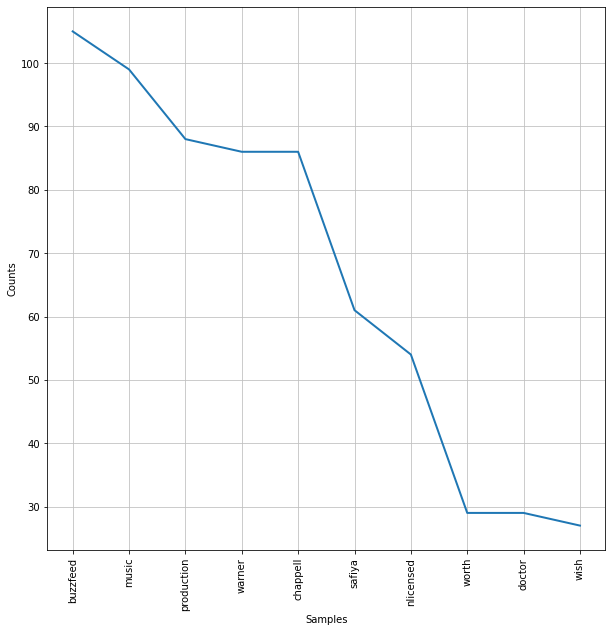

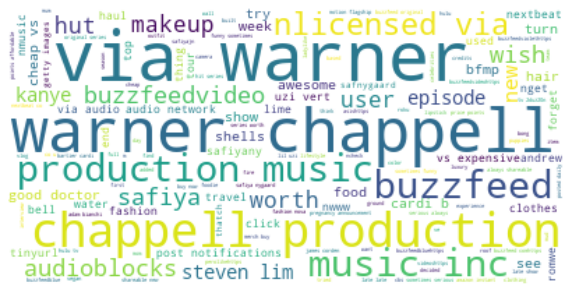

'Entertainment'

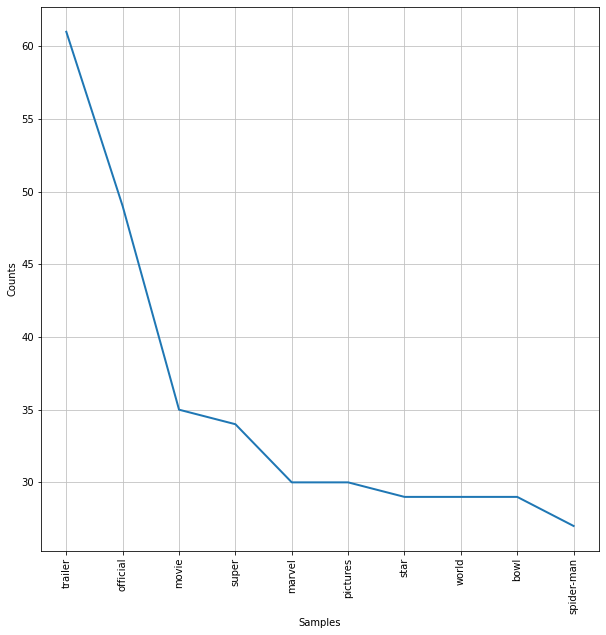

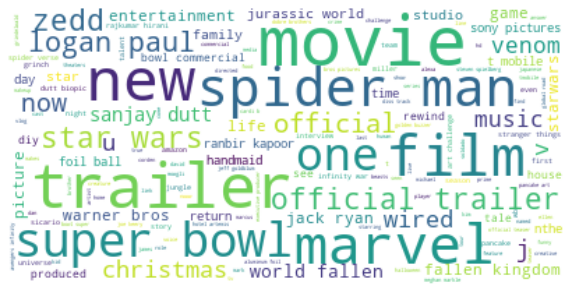

'Comedy'

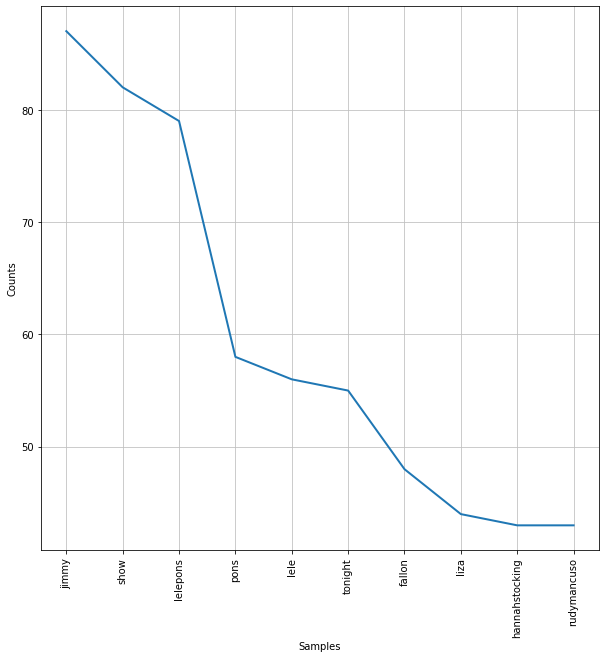

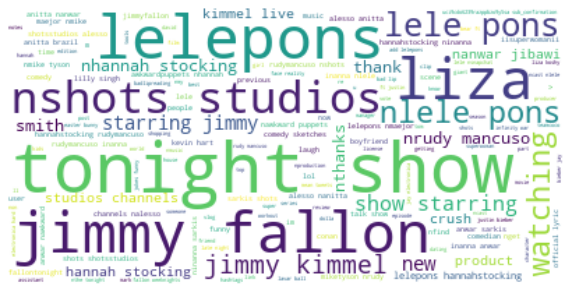

'Science & Technology'

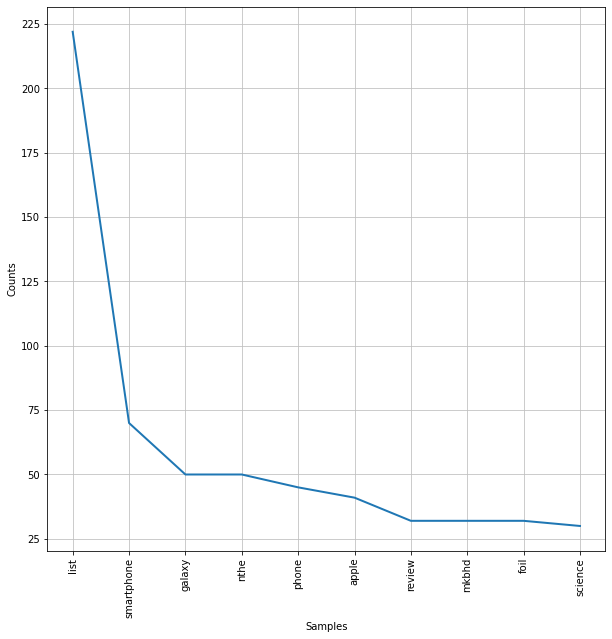

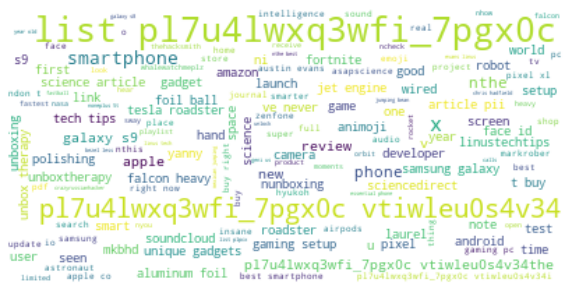

'Film & Animation'

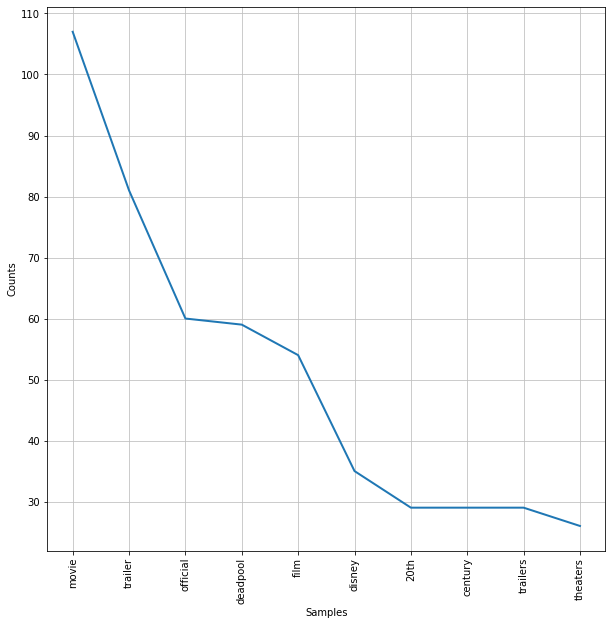

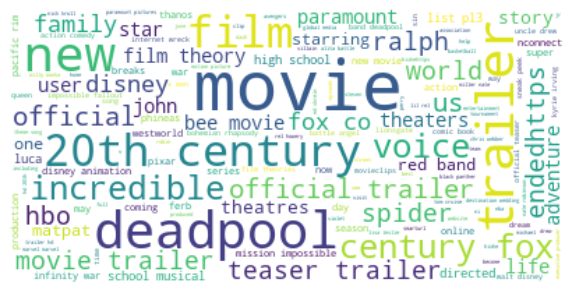

'News & Politics'

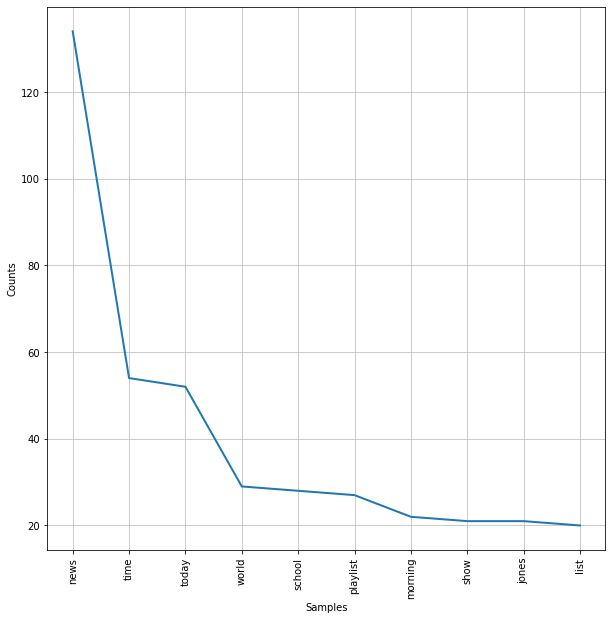

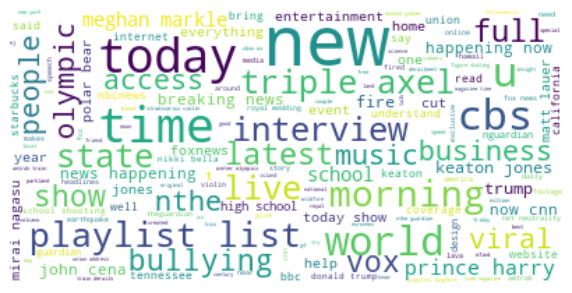

'Sports'

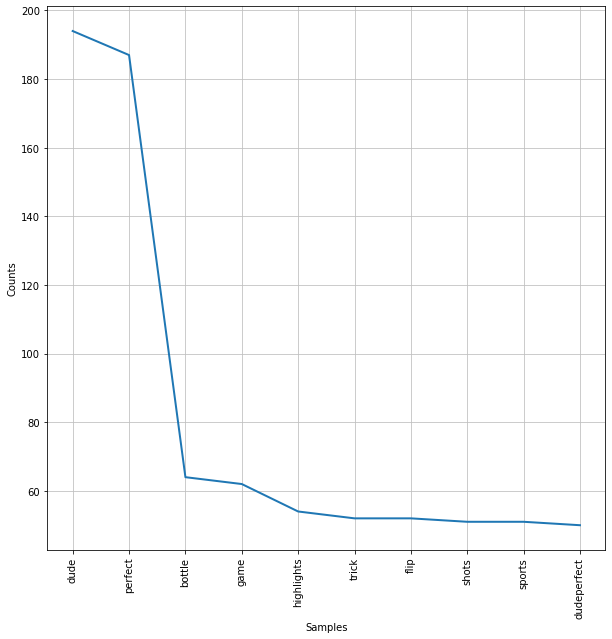

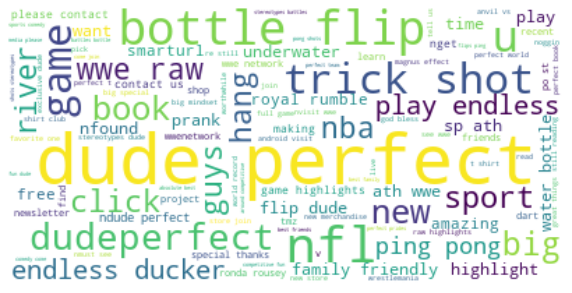

'Music'

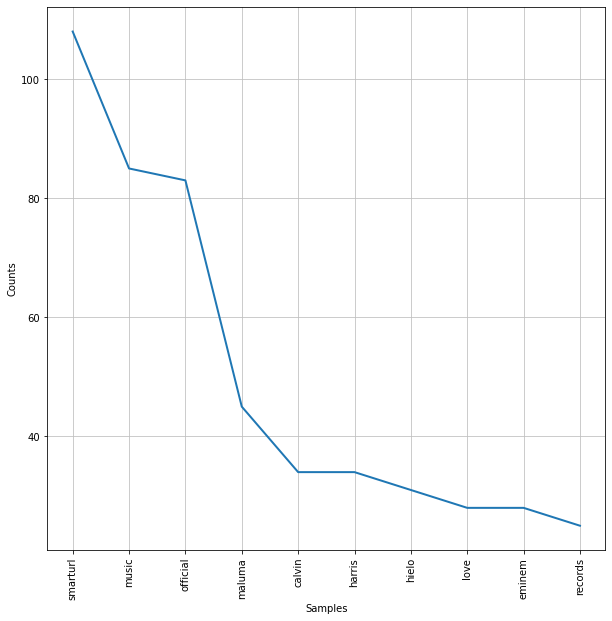

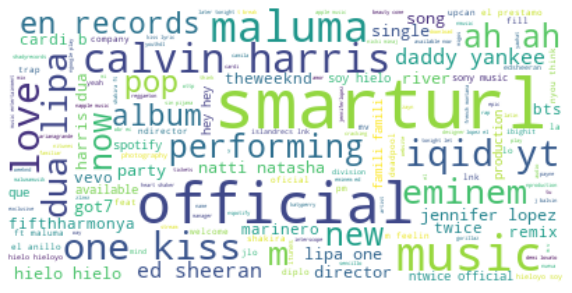

'Pets & Animals'

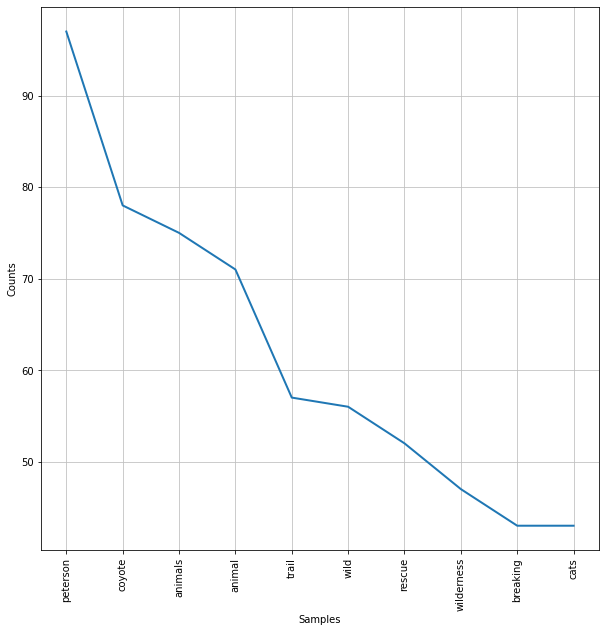

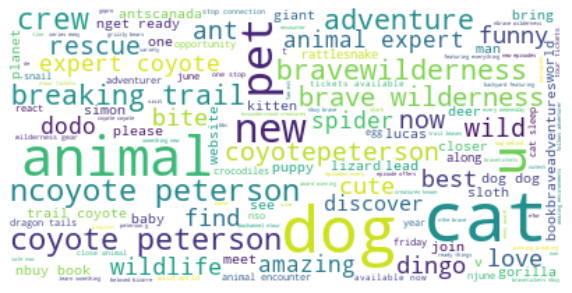

'Education'

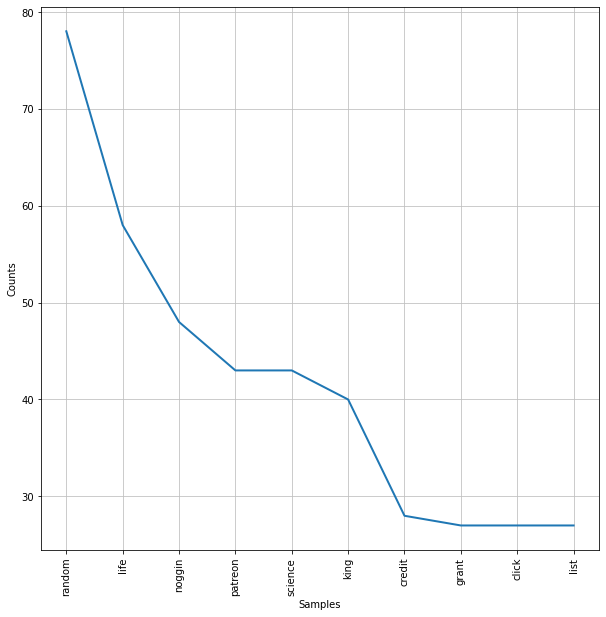

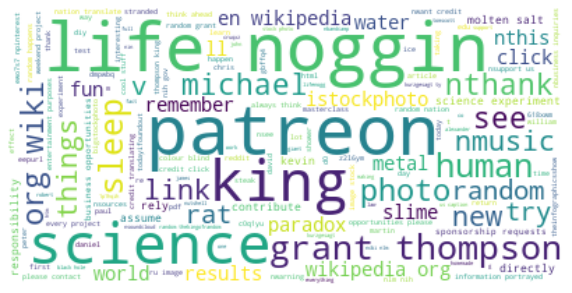

'Howto & Style'

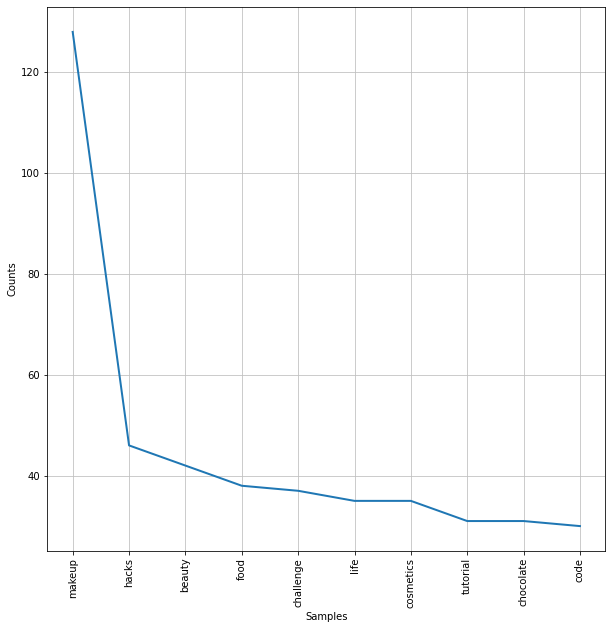

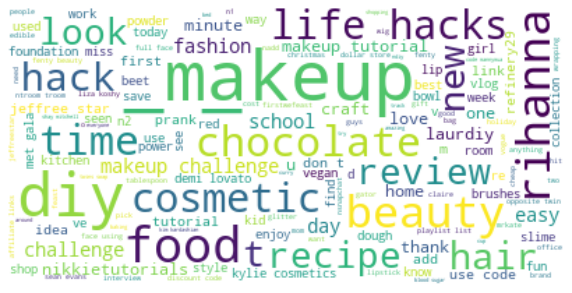

'Autos & Vehicles'

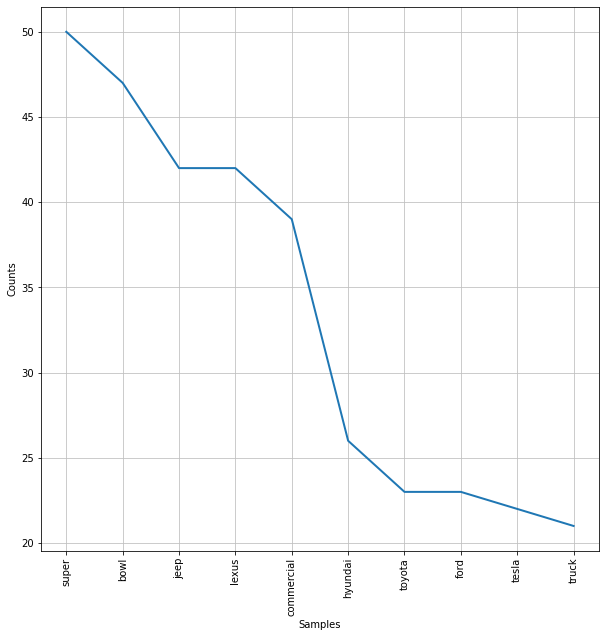

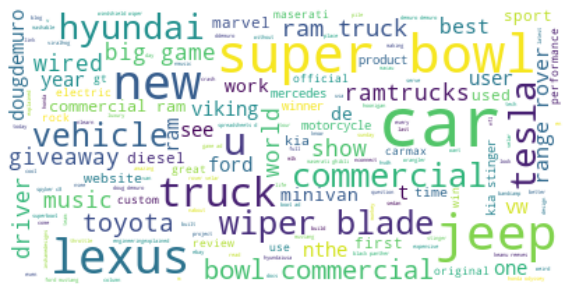

'Travel & Events'

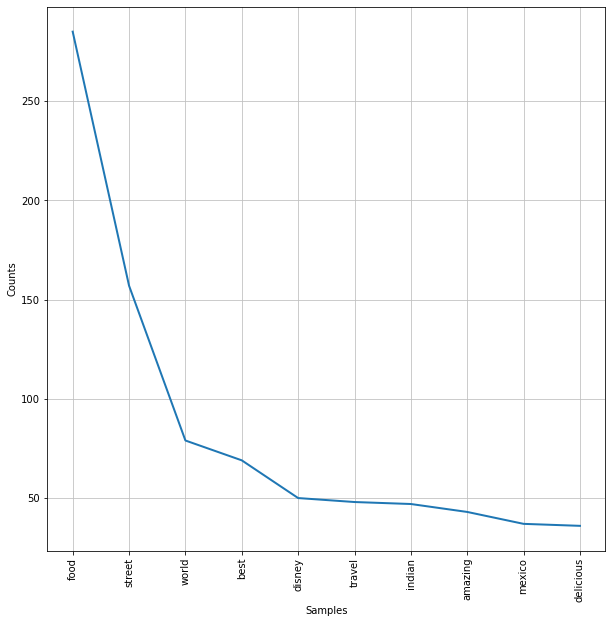

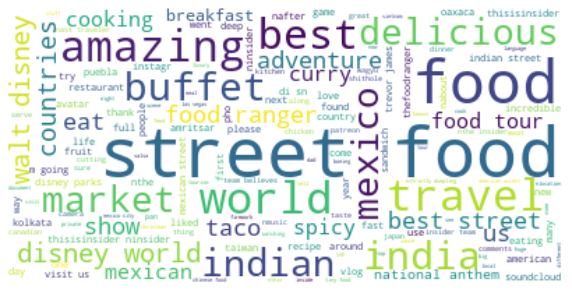

'Gaming'

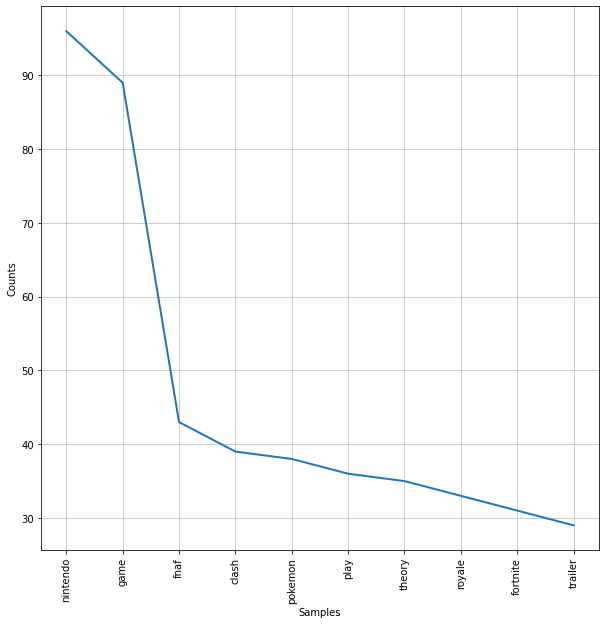

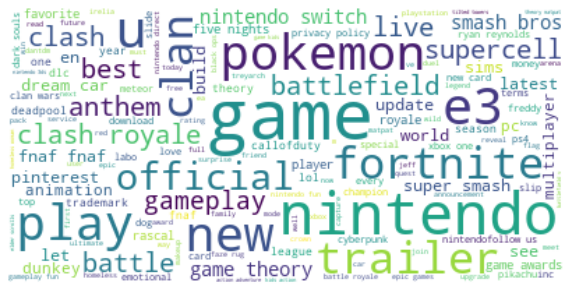

'Nonprofits & Activism'

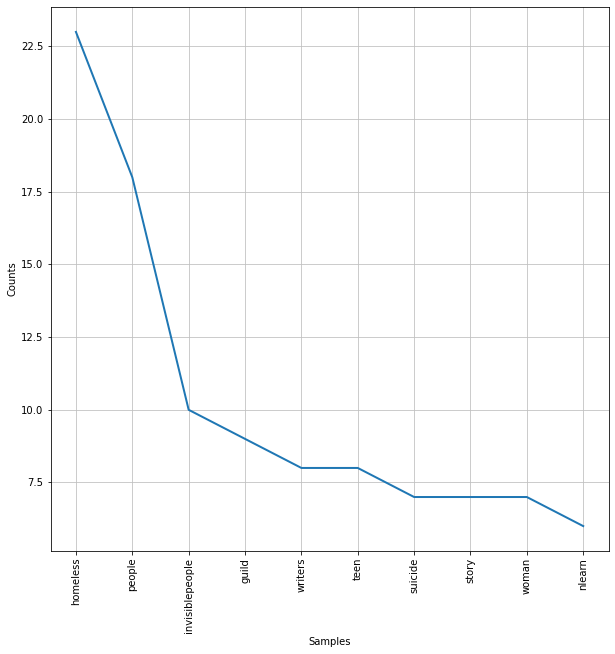

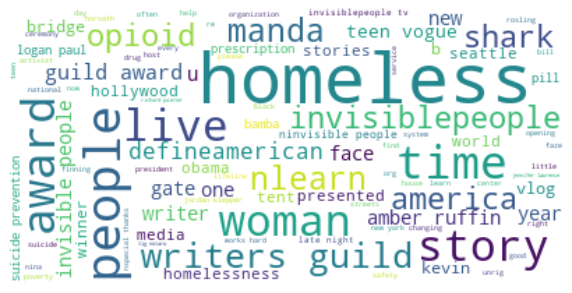

'Shows'

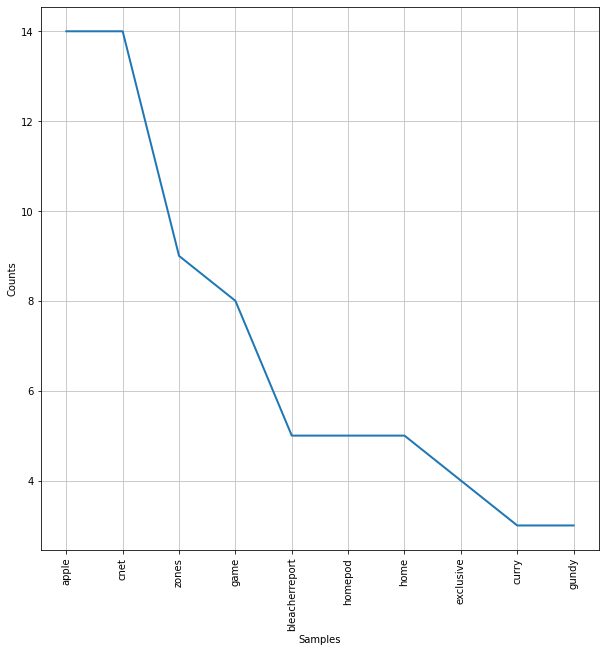

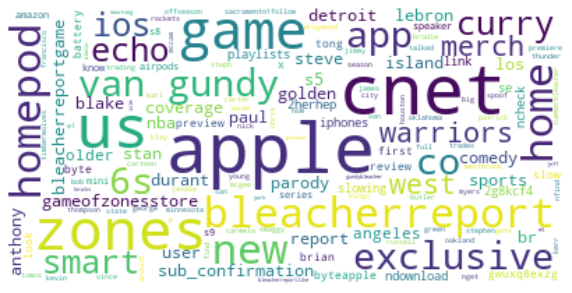

In [318]:
for category in categories:
    df_top_for_category = df[df['category_name'] == category].groupby('video_id', as_index=False)\
        [['description', 'video_title', 'tags', 'views']].max().sort_values(by='views', ascending=False)[:50]
    description = df_top_for_category['description'].values
    video_title = df_top_for_category['video_title'].values
    tags = df_top_for_category['tags'].values

    text = description + video_title + tags
    
    try:
        text = ' '.join(text)
    except Exception:
        text = ' '
    
    tokenlist = nltk.word_tokenize(text, 'english')
    fdist = nltk.FreqDist([word for word in tokenlist if len(word) > 3 if word not in stopwords])
    most_common = fdist.most_common(10)

    display(category)
    fdist.plot(10)
    generate_wordcloud(text, stopwords)

### 4. ¿La temporada o fecha en el que el video es publicado tiene alguna influencia? 

### 5. ¿Es posible predecir cuantos likes o visitas tendrá un video? Si es así, crea un modelo que lo compruebe.